In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = "https://raw.githubusercontent.com/aniruddha7599/FoML-Project/refs/heads/main/my_dataframe.csv"
data = pd.read_csv(data_url)

In [3]:
# Display the first few rows of the dataset
print(data.head())

   Age  Gender (Female=0, Male=1)  Height (cm)  Weight (kg)  Body Mass Index  \
0   60                          0          150           80            35.56   
1   55                          0          154           73            30.78   
2   53                          1          170          101            34.95   
3   33                          1          175           95            31.02   
4   23                          1          162           68            25.91   

   Waist Circumference (cm)  Hip Circumference (cm)  Diabetes (No=0, Yes=1)  \
0                     119.0                   104.0                       0   
1                     101.0                    98.0                       0   
2                     116.0                   112.0                       1   
3                     114.0                   114.0                       1   
4                     101.0                    97.0                       0   

   Smoking Status(Not Smoking=0, Smoking=1) 

In [4]:
# Define input and output variables
X = data.drop(columns=["Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"])
y = data["Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"]

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
# Initialize and train the logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [7]:
# Make predictions
y_pred = model.predict(X_test)

In [8]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [9]:
# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6319
Precision: 0.7822
Recall: 0.6371
F1 Score: 0.7022


In [10]:
# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6318681318681318
Precision: 0.7821782178217822
Recall: 0.6370967741935484
F1 Score: 0.7022222222222222
Confusion Matrix:
 [[36 22]
 [45 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.62      0.52        58
           1       0.78      0.64      0.70       124

    accuracy                           0.63       182
   macro avg       0.61      0.63      0.61       182
weighted avg       0.67      0.63      0.64       182



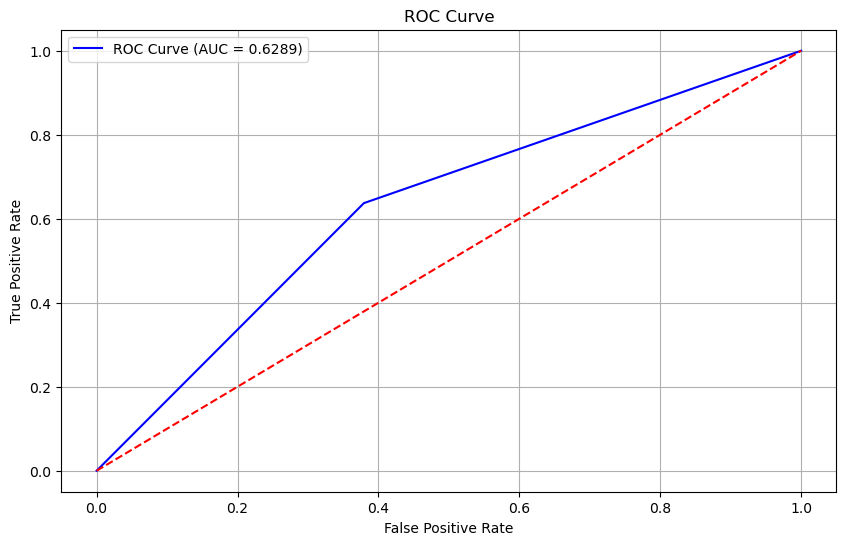

In [11]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

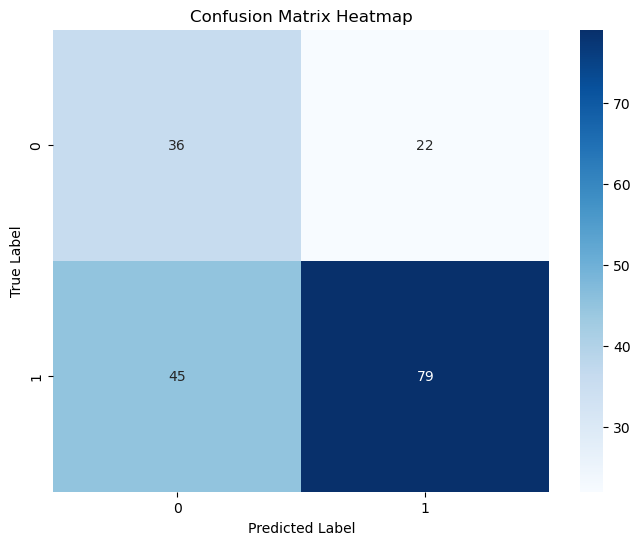

In [12]:
# Confusion matrix and heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()